## Random Forest para Arboles de Clasificación

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [3]:
dataset=pd.read_csv('../python-ml-course/datasets/iris/iris.csv')
dataset.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
predictors=dataset.columns.values.tolist()[:4]
target=dataset.columns.values.tolist()[4]

In [5]:
#Se crean conjuntos de entrenamiento
dataset['is_train']=np.random.uniform(0,1,len(dataset))<=.75 
train,test=dataset[dataset['is_train']==True],dataset[dataset['is_train']==False]

In [6]:
#Se crea modelo con el metodo de entropia y un minimo de 20 muestras por nodo, con la semilla 99 para el propio metodo
model=DecisionTreeClassifier(criterion='entropy',min_samples_split=20,random_state=99) 

model.fit(train[predictors],train[target])#se entrena

predicciones=model.predict(test[predictors])#se realizan predicicones

pd.crosstab(test[target],predicciones,rownames=['Valor Real'],colnames=['Valor Predicho'])

Valor Predicho,setosa,versicolor,virginica
Valor Real,,,
setosa,14,0,0
versicolor,0,13,2
virginica,0,3,8


### Visualizacion de Arbol

In [7]:
from sklearn.tree import export_graphviz

In [8]:
with open('iris-dtree.dot','w') as dotfile: #creamos un archivo llamado iris-dtree.dot
    export_graphviz(model,out_file=dotfile,feature_names=predictors) #seteamos los parametros(modelo,archivo,predictores)
    dotfile.close()

In [9]:
import os
from graphviz import Source #(conda install python-graphviz)

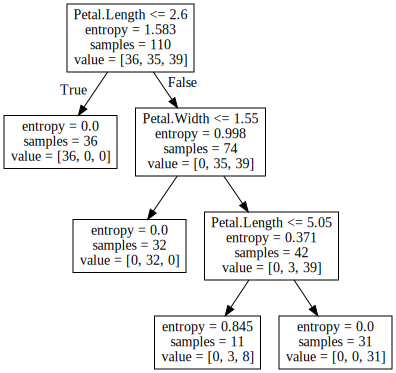

In [10]:
file=open('iris-dtree.dot','r')
text=file.read()
Source(text)

### Validacion Cruzada para la poda del arbol

In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X=dataset[predictors]

Y=dataset[target]

In [14]:
for i in range(1,11): #bucle para validar con que profundidad (max_depth) se obtiene un mejor score
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y) #min_samples_split=numero min de muestras por rama
    
    cross_validation=KFold(n_splits=10,shuffle=True,random_state=1) #n_splits=numero de iteraciones
    
    scores=cross_val_score(tree,X,Y,scoring='accuracy',cv=cross_validation)
    score=np.mean(scores) #score basado en la exactitud (mas cercano a 100 es mejor)
    
    print("Score para i = ",i," es de ", score)
    print('')
    print("Rasgos Clasificadores relevantes para este arbol:\n",list(zip(predictors,tree.feature_importances_)))#variables importantes
    print('')
    print('')

Score para i =  1  es de  0.5666666666666667

Rasgos Clasificadores relevantes para este arbol:
 [('Sepal.Length', 0.0), ('Sepal.Width', 0.0), ('Petal.Length', 1.0), ('Petal.Width', 0.0)]


Score para i =  2  es de  0.9200000000000002

Rasgos Clasificadores relevantes para este arbol:
 [('Sepal.Length', 0.0), ('Sepal.Width', 0.0), ('Petal.Length', 0.6662028463448376), ('Petal.Width', 0.3337971536551623)]


Score para i =  3  es de  0.9400000000000001

Rasgos Clasificadores relevantes para este arbol:
 [('Sepal.Length', 0.0), ('Sepal.Width', 0.0), ('Petal.Length', 0.6897698149958357), ('Petal.Width', 0.3102301850041643)]


Score para i =  4  es de  0.9333333333333333

Rasgos Clasificadores relevantes para este arbol:
 [('Sepal.Length', 0.0), ('Sepal.Width', 0.0), ('Petal.Length', 0.6686915796639514), ('Petal.Width', 0.33130842033604857)]


Score para i =  5  es de  0.9333333333333333

Rasgos Clasificadores relevantes para este arbol:
 [('Sepal.Length', 0.0), ('Sepal.Width', 0.0), ('Peta

# Random Forests

In [ ]:
from sklearn.ensemble import Random